<a href="https://colab.research.google.com/github/Shiblu31/CurrenSee/blob/main/CurrenSee_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pathlib

data_dir = "/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train"
data_dir = pathlib.Path(data_dir)

In [8]:
print(data_dir)

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train


In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 1018 files for training.


In [10]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1272 files belonging to 7 classes.
Using 254 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['1Hundred', '1Thousands', '2Hundred', '5Hundred', 'Fifty', 'Ten', 'Twenty']


/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_127.jpg


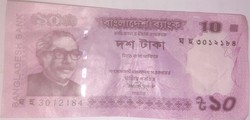

In [12]:
Ten = list(data_dir.glob('Ten/*'))
print(Ten[0])
PIL.Image.open(str(Ten[3]))

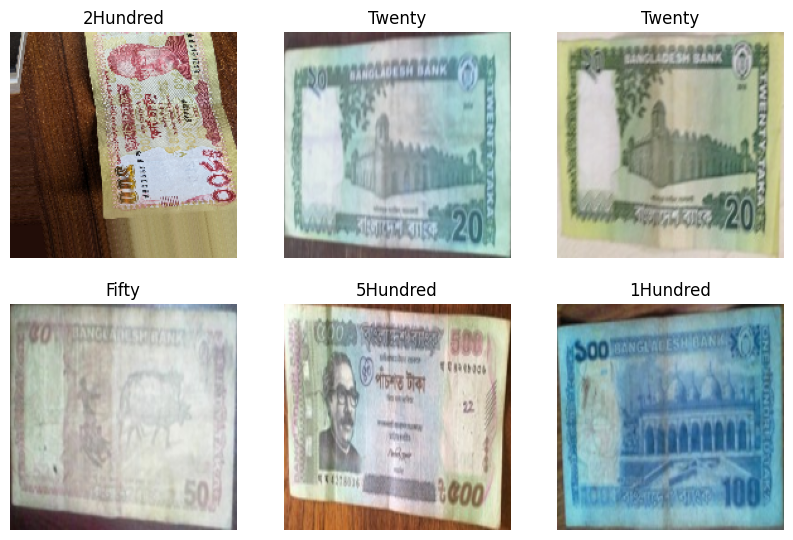

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
resnet_model = Sequential()


pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(180,180,3),
                                                  pooling='avg',  # Global average pooling
                                                  weights='imagenet')


for layer in pretrained_model.layers:
    layer.trainable = False


resnet_model.add(pretrained_model)


resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [20]:
#resnet_model.summary()

In [18]:
from tensorflow.keras.optimizers import Adam

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [19]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 313s 9s/step - accuracy: 0.5643 - loss: 1.2932 - val_accuracy: 0.9331 - val_loss: 0.2170
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 485ms/step - accuracy: 0.9672 - loss: 0.1267 - val_accuracy: 0.9685 - val_loss: 0.1156
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 402ms/step - accuracy: 0.9983 - loss: 0.0448 - val_accuracy: 0.9685 - val_loss: 0.0835
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 488ms/step - accuracy: 0.9981 - loss: 0.0273 - val_accuracy: 0.9724 - val_loss: 0.1014
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 436ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 0.9764 - val_loss: 0.0651
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9882 - val_loss: 0.0533
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9764 - val_loss: 0.0584
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accura

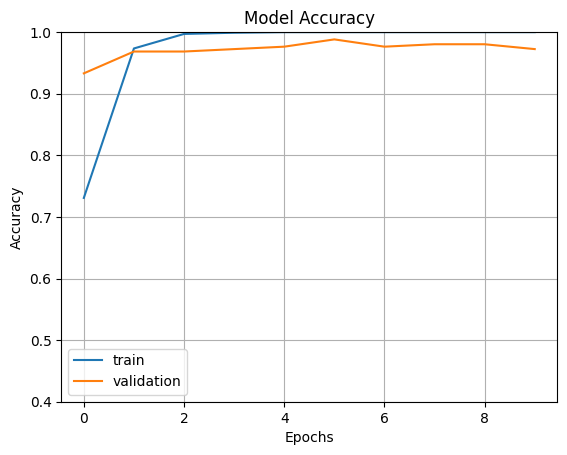

In [21]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

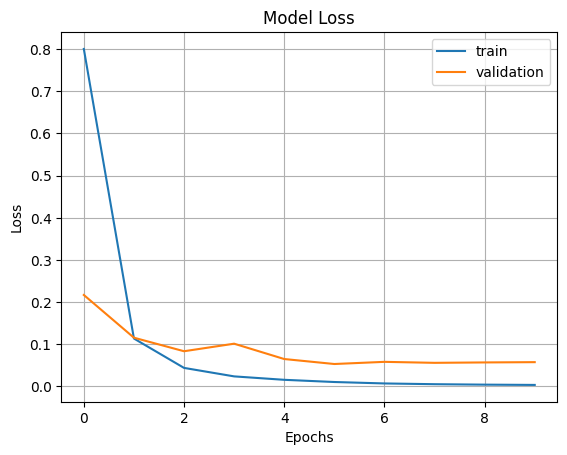

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Ten/10_106.jpg


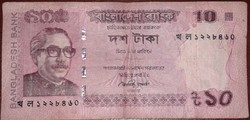

In [23]:
T = list(data_dir.glob('Ten/*'))
print(T[8])
PIL.Image.open(str(T[8]))

/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Fifty/50_115.jpg


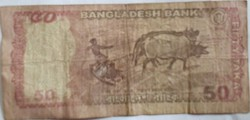

In [24]:
F = list(data_dir.glob('Fifty/*'))
print(F[0])
PIL.Image.open(str(F[0]))

In [25]:
import cv2
image=cv2.imread(str(F[5]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [26]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[8.2833227e-03 2.9343858e-04 1.7137975e-06 2.2102769e-03 9.8101681e-01
  6.9916970e-04 7.4952398e-03]]


/content/drive/MyDrive/DATASET/Currency/Bd Currency/Custom/Train/Fifty/50_120.jpg


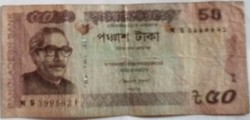

In [27]:
F = list(data_dir.glob('Fifty/*'))
print(F[5])
PIL.Image.open(str(F[5]))

In [28]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Fifty
